    Ben Christensen
    October 21 2018
    Math 403

# Pandas 3 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pydataset import data
%matplotlib inline

## Problem 1

The data `time_usage.txt` contains data on how Americans spend their time from 2007-2017.
Read in the data as a `DataFrame` object and use `groupby()` to filter through the \li{DataFrame} and answer the following questions:

1. How the mean amount of time spent on all activities change over the 2007 to 2017?

2. On average (using the mean), did Americans spend more time doing exercise or watching TV over the past ten years? What was the difference?

(Hint: The column `Estimate` gives the amount of hours spent on an activity. The activity `Watching TV` contains data on Americans watching TV and the activity `Participating in Sports Exercise and Rec Activity` contains data on Americans exercising.)


1. There is no change in total hours.

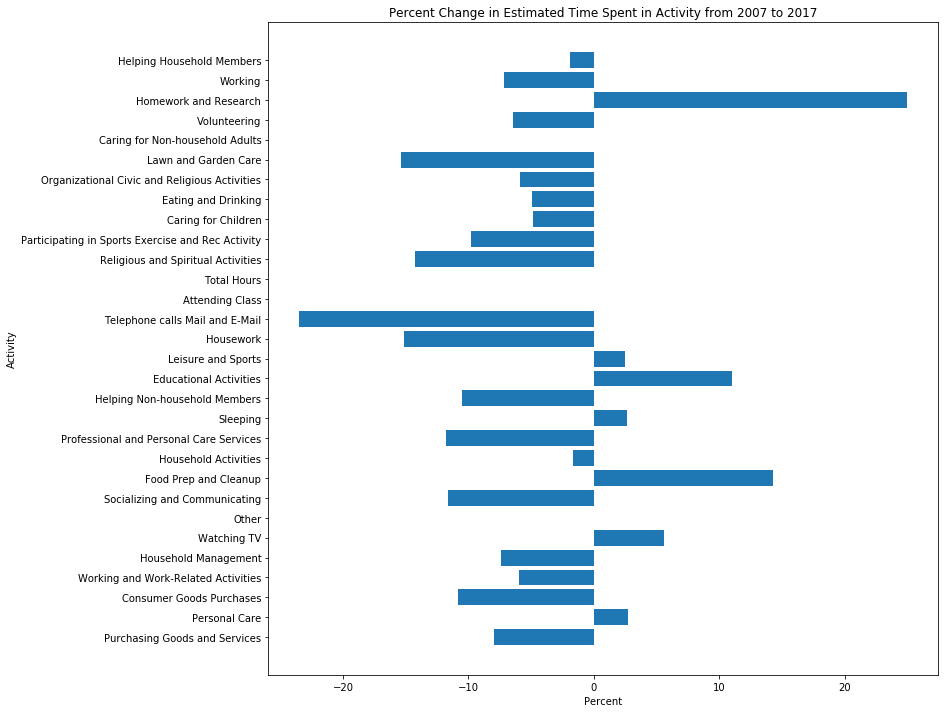

In [2]:
#Read in the comma-delimited textfile
time_usage = pd.read_csv("time_usage.txt", header=0)
#Compare means of all activities in 2007 to that of 2017

labels = np.array(list(set(time_usage["Activity"])))
y2007 = time_usage[time_usage["Year"] == 2007]
means_07 = np.array([y2007[y2007["Activity"] == label]["Estimate"].mean() for label in labels])
mask = means_07.argsort()

y2017 = time_usage[time_usage["Year"] == 2017]
means_17 = np.array([y2017[y2017["Activity"] ==label]["Estimate"].mean() for label in labels])

rel_diff = 100* ((means_17 - means_07) / ((means_07 + means_17)/2))

positions = np.arange(len(labels))
fig = plt.figure(figsize=(12,12))
plt.barh(positions,rel_diff, align="center")
plt.yticks(positions, labels)
plt.xlabel("Percent")
plt.ylabel("Activity")
plt.title("Percent Change in Estimated Time Spent in Activity from 2007 to 2017")
plt.show()


In [3]:
print("2.")
activities = time_usage.groupby("Activity")
print("Estimates are daily estimates from 2007-2017")
#Find average time (from 2007-2017) spent exercising
print("Estimated time spent excerising or participating in sports:")
print(activities.get_group('Participating in Sports Exercise and Rec Activity')["Estimate"].mean())
#Find average time (from 2007-2017) spent watching TV
print("Estimated time spent watching TV:")
print(activities.get_group('Watching TV')["Estimate"].mean())

2.
Estimates are daily estimates from 2007-2017
Estimated time spent excerising or participating in sports:
0.3063636363636364
Estimated time spent watching TV:
2.762727272727273


## Problem 2

Use the time usage data to answer the following questions. Support your claims with readable, labeled visualizations.

1. In what activity did Americans spend most of their time in 2017?

2. In what year did Watching TV increase the most? What about Volunteering?

1. Personal Care is the activity with the highest estimated time spent in 2017.

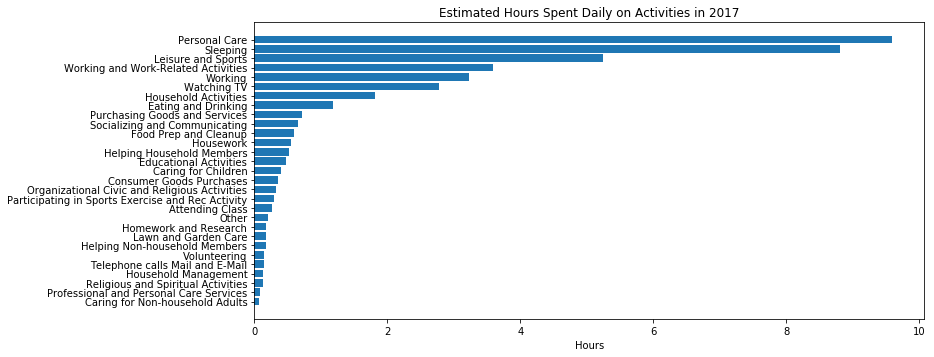

In [4]:
labels = np.array(list(set(time_usage["Activity"])))
y2017 = time_usage[time_usage["Year"] == 2017]
#Find the estimated time spent in each activity in 2017
means_17 = np.array([y2017[y2017["Activity"] ==label]["Estimate"].mean() for label in labels])
#Plot the activities by estimated time spent in ascending order
mask = means_17.argsort()
plt.figure(figsize=(12,12))
plt.subplot(212)
plt.barh(positions[:-1],means_17[mask][:-1], align="center")
no_labels = [""]*len(labels)
plt.yticks(positions[:-1], labels[mask][:-1])
plt.xlabel("Hours")
plt.title("Estimated Hours Spent Daily on Activities in 2017")
plt.show()

2.
Watching TV increased the most from 2007 to 2008
Volunteering increased the most from 2016 to 2017


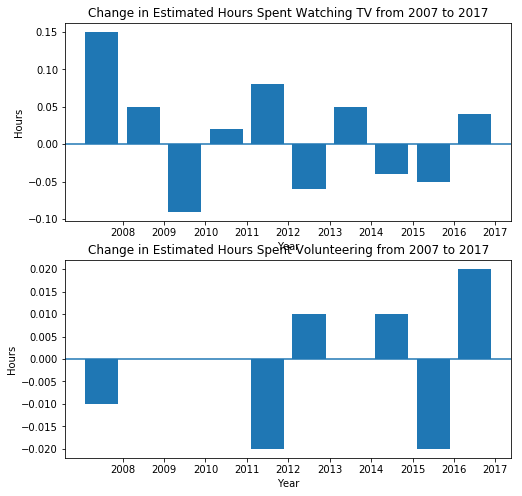

In [5]:
print("2.")
print("Watching TV increased the most from 2007 to 2008")
print("Volunteering increased the most from 2016 to 2017")

#Find the differences in estimated hours from year to year for TV and volunteering
TV_estimates = activities.get_group("Watching TV")["Estimate"].values
TV_diff = np.array([TV_estimates[i] - TV_estimates[i-1] for i in range(1, len(TV_estimates))])
#Calculate year with max increase for watching TV
max_TV, TV_year = TV_diff.max(), TV_diff.argmax() + 2008
vol_estimates = activities.get_group("Volunteering")["Estimate"].values
vol_diff = np.array([vol_estimates[i] - vol_estimates[i-1] for i in range(1, len(vol_estimates))])
#Calculate year with max increase for volunteering
max_vol, vol_year = vol_diff.max(), vol_diff.argmax() + 2008
#Plot changes in estimated hours spent watching TV
x = np.arange(2008, 2018)
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.bar(x, TV_diff)
plt.ylabel("Hours")
plt.xlabel("Year")
x_positions = x+.5
plt.xticks(x_positions, x)
plt.axhline()
plt.title("Change in Estimated Hours Spent Watching TV from 2007 to 2017")
#Plot changes in estimated hours spent volunteering
plt.subplot(212)
plt.bar(x, vol_diff)
plt.ylabel("Hours")
plt.xlabel("Year")
plt.xticks(x_positions, x)
plt.axhline()
plt.title("Change in Estimated Hours Spent Volunteering from 2007 to 2017")
plt.show()






## Problem 3

The file `Ohio_1999.csv` contains data on workers in Ohio in the year 1999. Use pivot tables to answer the following questions:

1. What was the highest paid race/sex combination? What was the lowest paid?

2. What race/sex combination worked the least amount of hours? What from the data explains why?

3. What race/sex combination works the most hours per week per person?

Some useful keys for the information are:

1. In column `Sex`, {1: `male`,2: `female`}

2. In column `Race`, {1: `White`,2: `African-American`,3: `Native American/Eskimo`,4: `Asian`}

1) Male White is the highest paid race/sex combination when using yearly salary

In [6]:
ohio = pd.read_csv("Ohio_1999.csv")
#Examine the data using pivot tables
ohio.pivot_table(values="Yearly Salary", index="Race", columns="Sex", aggfunc="sum")

Sex,1,2
Race,,
1,40620140,17779938
2,1939452,1809881
3,159000,29000
4,815206,328300


2) Native American/Eskimo women worked the least amount of hours

This makes sense because there is only one Native American/Eskimo woman in the dataset.

In [7]:
ohio.pivot_table(values="Usual Hours Worked", index="Race", columns="Sex", aggfunc="sum")

Sex,1,2
Race,,
1,36939,23335
2,2382,2584
3,146,40
4,580,365


3) Native American/Eskmimo men worked the most per hour:

In [8]:
ohio.pivot_table(values="Usual Hours Worked", index="Race", columns="Sex", aggfunc="mean")

Sex,1,2
Race,,
1,43.254098,40.512153
2,40.372881,38.000000
3,48.666667,40.000000
4,38.666667,40.555556


## Problem 4

Use the employment data from Ohio in 1999 to answer the following questions:

1. The column `Educational Attainment` contains numbers 0-46. Any number less than 39 means the person did not get any form of degree. 40-42 refers to either a high-school or associate's degree. A number greater than 43 means the person got at least a bachelor's degree. What is the most common degree among workers?

2. Partition the `Age` column into 4 equally populated intervals. Which interval contains the most workers with no degree? A degree that is less than a bachelor's degree? A bachelor's degree or higher?

3. What age/degree combination has the greatest yearly salary on average?


1) The most common degree is no degree:

In [9]:
#Create 4 bins for educational attainment
schooling = pd.cut(ohio["Educational Attainment"], [0,39,42,46])
ohio.pivot_table(columns=schooling, aggfunc="count")    

Educational Attainment,"(0, 39]","(39, 42]","(42, 46]"
Age,693,362,530
Educational Attainment,693,362,530
Race,693,362,530
Sex,693,362,530
Usual Hours Worked,693,362,530
Usual Weekly Earnings,693,362,530
Yearly Salary,693,362,530


2) The 16-32 age range contains the most people with no degree. That age range also has the greatest number of degrees less than a bachelor's degree. The 32-40 age range has the greatest number of bachelor's degrees or higher:

In [10]:
d_age = pd.qcut(ohio["Age"], 4)
ohio["count"] = 1
ohio.pivot_table(values="count",index=d_age,columns=schooling,aggfunc="count")

Educational Attainment,"(0, 39]","(39, 42]","(42, 46]"
Age,,,
"(15.999, 32.0]",193,107,130
"(32.0, 40.0]",151,88,141
"(40.0, 49.0]",181,90,139
"(49.0, 85.0]",168,77,120


3) 49 to 85 with at least a bachelor's degree has the highest yearly salary:

In [11]:
ohio.pivot_table(values="Yearly Salary", index=d_age, columns=schooling)

Educational Attainment,"(0, 39]","(39, 42]","(42, 46]"
Age,,,
"(15.999, 32.0]",23456.025907,27218.355140,39720.338462
"(32.0, 40.0]",29030.231788,36018.602273,59218.014184
"(40.0, 49.0]",30204.055249,41738.266667,61728.827338
"(49.0, 85.0]",30050.988095,40149.233766,75260.100000


## Problem 5

The `pydataset` contains a data set `iris`, which contains the measurements of various flower species.
Use this data to answer the following questions:

1. Which flower species is the easiest distinguish and why?

2. What is the correlation between petal and sepal size for each species?

1) Setosa is the easiest to ditinguish because it is the only species without any flowers with sepal length greater than 6.3 cm. It is also the only species to have flowers with petal length less than 2.633 cm. and petal width less than or equal to .867 cm. 

In [12]:
iris = data("iris")
iris["count"] = 1
#Create categories for the lengths and widths for use in the pivot tables
s_length = pd.qcut(iris["Sepal.Length"], 3)
s_width = pd.qcut(iris["Sepal.Width"], 3)
p_length = pd.qcut(iris["Petal.Length"], 3)
p_width = pd.qcut(iris["Petal.Width"], 3)
iris.pivot_table(values="count",index="Species", columns=[s_length], aggfunc="count", fill_value='-')

Sepal.Length,"(4.299, 5.4]","(5.4, 6.3]","(6.3, 7.9]"
Species,,,
setosa,45,5,-
versicolor,6,33,11
virginica,1,18,31


In [13]:
iris.pivot_table(values="count",index="Species", columns=[s_width], aggfunc="count", fill_value='-')

Sepal.Width,"(1.999, 2.9]","(2.9, 3.2]","(3.2, 4.4]"
Species,,,
setosa,2,15,33
versicolor,34,14,2
virginica,21,21,8


In [14]:
iris.pivot_table(values="count",index="Species", columns=[p_length], aggfunc="count", fill_value='-')

Petal.Length,"(0.999, 2.633]","(2.633, 4.9]","(4.9, 6.9]"
Species,,,
setosa,50,-,-
versicolor,-,48,2
virginica,-,6,44


In [15]:
iris.pivot_table(values="count",index="Species", columns=[p_width], aggfunc="count", fill_value='-')

Petal.Width,"(0.099, 0.867]","(0.867, 1.6]","(1.6, 2.5]"
Species,,,
setosa,50,-,-
versicolor,-,48,2
virginica,-,4,46


2) This table gives the correlation between petal and sepal size for each species:

In [16]:
#Drop the placeholder "count" variable I created
iris.drop("count", axis=1, inplace=True)
species_groups = iris.groupby("Species")
species_groups.corr()

Petal.Length  Petal.Width  Sepal.Length  Sepal.Width
Species                                                                      
setosa     Petal.Length      1.000000     0.331630      0.267176     0.177700
           Petal.Width       0.331630     1.000000      0.278098     0.232752
           Sepal.Length      0.267176     0.278098      1.000000     0.742547
           Sepal.Width       0.177700     0.232752      0.742547     1.000000
versicolor Petal.Length      1.000000     0.786668      0.754049     0.560522
           Petal.Width       0.786668     1.000000      0.546461     0.663999
           Sepal.Length      0.754049     0.546461      1.000000     0.525911
           Sepal.Width       0.560522     0.663999      0.525911     1.000000
virginica  Petal.Length      1.000000     0.322108      0.864225     0.401045
           Petal.Width       0.322108     1.000000      0.281108     0.537728
           Sepal.Length      0.864225     0.281108      1.000000     0.457228
           Sepal.Width       0.401045     0.537728      0.457228     1.000000